### i have  trained the model to predict the people who are survived and not survived 

In [66]:
## importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [70]:
df=pd.read_csv('titanic ignitus.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


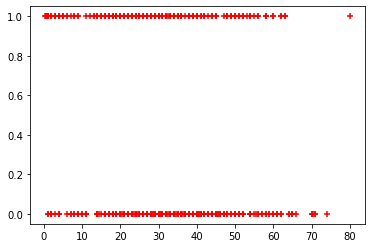

In [75]:
plt.scatter(df.Age,df.Survived,marker='+',color='red')

In [68]:
df.shape

(891, 12)

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.Embarked.unique()
    

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
## getting dummies from a categorical column
dummies=pd.get_dummies(df['Sex'])
df=pd.concat([df,dummies],axis='columns')


In [15]:
df1=df.drop(['PassengerId','Name','Sex','Embarked'],axis='columns')
df1.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,female,male
Survived,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.147541,0.852459
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.681287,0.318713


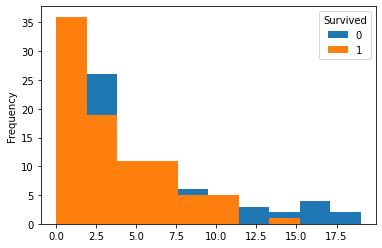

In [16]:
pd.crosstab(df1.Age,df1.Survived).plot(kind='hist')

In [17]:
df1

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0
3,1,1,35.0,1,0,113803,53.1000,C123,1,0
4,0,3,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,NaN,0,1
887,1,1,19.0,0,0,112053,30.0000,B42,1,0
888,0,3,NaN,1,2,W./C. 6607,23.4500,NaN,1,0
889,1,1,26.0,0,0,111369,30.0000,C148,0,1


In [31]:
## replacing null values with mean of that column
df1.Age=df1['Age'].fillna(df1['Age'].mean())
df1.Cabin=df1['Cabin'].fillna('-')
df1.isna().sum()


Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
female      0
male        0
dtype: int64

In [58]:
x=df1.drop(['Survived','Ticket','Cabin'],axis='columns')
y=df1['Survived']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression

In [81]:
model=LogisticRegression()

In [90]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(596, 7) (596,) (295, 7) (295,)


In [92]:
model.fit(x_train,y_train)

C:\Users\Ramesh kumar\anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [100]:
model.score(x_test,y_test)

0.8101694915254237

In [103]:
model.predict_proba(x_test[:10])

array([[0.9140789 , 0.0859211 ],
       [0.76788728, 0.23211272],
       [0.84743184, 0.15256816],
       [0.11940805, 0.88059195],
       [0.33462656, 0.66537344],
       [0.07091799, 0.92908201],
       [0.37092971, 0.62907029],
       [0.89544027, 0.10455973],
       [0.28687164, 0.71312836],
       [0.09091341, 0.90908659]])

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[154,  21],
       [ 35,  85]], dtype=int64)

Text(69.0, 0.5, 'Truth')

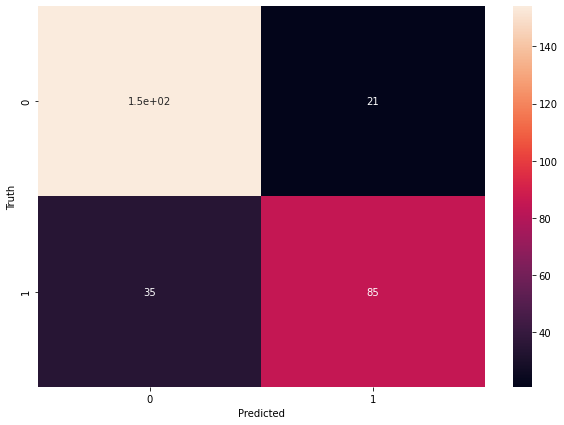

In [109]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')